# Sequence Embedding for Clustering and Classification

This notebook just reproduces:
<br>
https://github.com/cran2367/sgt

For explanation read:
<br>
https://towardsdatascience.com/sequence-embedding-for-clustering-and-classification-f816a66373fb

We first read the sequence data, and convert it into a list of lists. As shown below, each sequence is a list of alphabets.

In [1]:
import sgt
from sgt import SGT
sgt.__version__

'2.0.3'

## Installation Test Examples

In [3]:
import numpy as np
sgt = SGT(flatten=False)
sequence = np.array(["B","B","A","C","A","C","A","A","B","A"])
sgt.fit(sequence)

,A,B,C
A,0.090616,0.131002,0.261849
B,0.086569,0.123042,0.052544
C,0.137142,0.028263,0.135335


In [4]:
sgt = SGT(flatten=True)
sequence = np.array(["B","B","A","C","A","C","A","A","B","A"])
sgt.fit(sequence)

(A, A)    0.090616
(A, B)    0.131002
(A, C)    0.261849
(B, A)    0.086569
(B, B)    0.123042
(B, C)    0.052544
(C, A)    0.137142
(C, B)    0.028263
(C, C)    0.135335
dtype: float64

In [5]:
import pandas as pd

In [6]:
corpus = pd.DataFrame([[1, ["B","B","A","C","A","C","A","A","B","A"]], [2, ["C", "Z", "Z", "Z", "D"]]], columns=['id', 'sequence'])
corpus

,id,sequence
0,1,"[B, B, A, C, A, C, A, A, B, A]"
1,2,"[C, Z, Z, Z, D]"


In [7]:
sgt = SGT(kappa=1, 
          flatten=True, 
          lengthsensitive=False, 
          mode='default')
sgt.fit_transform(corpus)

,id,"(A, A)","(A, B)","(A, C)","(A, D)","(A, Z)","(B, A)","(B, B)","(B, C)","(B, D)",...,"(D, A)","(D, B)","(D, C)","(D, D)","(D, Z)","(Z, A)","(Z, B)","(Z, C)","(Z, D)","(Z, Z)"
0,1.0,0.090616,0.131002,0.261849,0.0,0.0,0.086569,0.123042,0.052544,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184334,0.290365


## Protein Sequence Clustering

In [10]:
# Loading data
corpus = pd.read_csv('../data_sgt/protein_classification.csv')

# Data preprocessing
corpus = corpus.loc[:,['Entry','Sequence']]
corpus.columns = ['id', 'sequence']
corpus['sequence'] = corpus['sequence'].map(list)
corpus

,id,sequence
0,M7MCX3,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
1,K6PL84,"[M, E, I, E, K, N, Y, R, M, N, S, L, F, E, F, ..."
2,R4W5V3,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
3,T2A126,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
4,L0SHD5,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
...,...,...
2107,A0A081R612,"[M, M, N, M, Q, N, M, M, R, Q, A, Q, K, L, Q, ..."
2108,A0A081QQM2,"[M, M, N, M, Q, N, M, M, R, Q, A, Q, K, L, Q, ..."
2109,J1A517,"[M, M, R, Q, A, Q, K, L, Q, K, Q, M, E, Q, S, ..."
2110,F5U1T6,"[M, M, N, M, Q, S, M, M, K, Q, A, Q, K, L, Q, ..."


In [11]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False)
sgtembedding_df = sgt_.fit_transform(corpus)

In [12]:
sgtembedding_df

,id,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)",...,"(Y, M)","(Y, N)","(Y, P)","(Y, Q)","(Y, R)","(Y, S)","(Y, T)","(Y, V)","(Y, W)","(Y, Y)"
0,M7MCX3,0.020180,0.0,0.009635,0.013529,0.009360,0.003205,2.944887e-10,0.002226,0.000379,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
1,K6PL84,0.001604,0.0,0.012637,0.006323,0.006224,0.004819,3.560677e-03,0.001124,0.012136,...,0.135335,0.006568,0.038901,0.011298,0.012578,0.009913,0.001079,0.000023,0.0,0.007728
2,R4W5V3,0.012448,0.0,0.008408,0.016363,0.027469,0.003205,2.944887e-10,0.004249,0.013013,...,0.008114,0.007128,0.000000,0.000203,0.001757,0.022736,0.000249,0.012652,0.0,0.008533
3,T2A126,0.010545,0.0,0.012560,0.014212,0.013728,0.000000,2.944887e-10,0.007223,0.000309,...,0.000325,0.009669,0.000000,0.003182,0.001904,0.015607,0.000577,0.007479,0.0,0.008648
4,L0SHD5,0.020180,0.0,0.008628,0.015033,0.009360,0.003205,2.944887e-10,0.002226,0.000379,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,A0A081R612,0.014805,0.0,0.004159,0.017541,0.012701,0.013099,0.000000e+00,0.017043,0.004732,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2108,A0A081QQM2,0.010774,0.0,0.004283,0.014732,0.014340,0.014846,0.000000e+00,0.016806,0.005406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2109,J1A517,0.010774,0.0,0.004283,0.014732,0.014340,0.014846,0.000000e+00,0.014500,0.005406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2110,F5U1T6,0.015209,0.0,0.005175,0.023888,0.011410,0.011510,0.000000e+00,0.021145,0.009280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [13]:
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df.head(5)

,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)","(A, L)",...,"(Y, M)","(Y, N)","(Y, P)","(Y, Q)","(Y, R)","(Y, S)","(Y, T)","(Y, V)","(Y, W)","(Y, Y)"
id,,,,,,,,,,,,,,,,,,,,,
M7MCX3,0.020180,0.0,0.009635,0.013529,0.009360,0.003205,2.944887e-10,0.002226,0.000379,0.021703,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
K6PL84,0.001604,0.0,0.012637,0.006323,0.006224,0.004819,3.560677e-03,0.001124,0.012136,0.018427,...,0.135335,0.006568,0.038901,0.011298,0.012578,0.009913,0.001079,0.000023,0.0,0.007728
R4W5V3,0.012448,0.0,0.008408,0.016363,0.027469,0.003205,2.944887e-10,0.004249,0.013013,0.031118,...,0.008114,0.007128,0.000000,0.000203,0.001757,0.022736,0.000249,0.012652,0.0,0.008533
T2A126,0.010545,0.0,0.012560,0.014212,0.013728,0.000000,2.944887e-10,0.007223,0.000309,0.028531,...,0.000325,0.009669,0.000000,0.003182,0.001904,0.015607,0.000577,0.007479,0.0,0.008648
L0SHD5,0.020180,0.0,0.008628,0.015033,0.009360,0.003205,2.944887e-10,0.002226,0.000379,0.021703,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419


In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(7)

In [17]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)

X=pca.transform(sgtembedding_df)

print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['x1', 'x2'])
df.head()

0.6432744907364979


,x1,x2
0,0.384913,-0.269873
1,0.022764,0.135995
2,0.177792,-0.172454
3,0.168074,-0.147334
4,0.383616,-0.271163


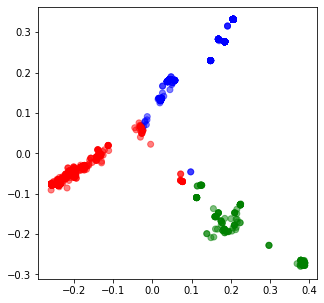

In [18]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

## Sequence Classification using Deep Learning in TensorFlow

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Loading data
data = pd.read_csv('../data_sgt/protein_classification.csv')


# Data preprocessing
y = data['Function [CC]']
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

corpus = data.loc[:,['Entry','Sequence']]
corpus.columns = ['id', 'sequence']
corpus['sequence'] = corpus['sequence'].map(list)

In [23]:
# Sequence embedding
sgt_ = SGT(kappa=1, 
           lengthsensitive=False)
sgtembedding_df = sgt_.fit_transform(corpus)
X = sgtembedding_df.set_index('id')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics

In [26]:
import tensorflow as tf
from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

In [28]:
kfold = 10
X = X
y = encoded_y

random_state = 1

test_F1 = np.zeros(kfold)
skf = KFold(n_splits = kfold, shuffle = True, random_state = random_state)
k = 0
epochs = 50
batch_size = 128

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = Sequential()
    model.add(Dense(64, input_shape = (X_train.shape[1],))) 
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X_train, y_train ,batch_size=batch_size, epochs=epochs, verbose=0)
    
    y_pred = model.predict(X_test).round().astype(int)
    y_train_pred = model.predict(X_train).round().astype(int)

    test_F1[k] = sklearn.metrics.f1_score(y_test, y_pred)
    k+=1
    
print ('Average f1 score', np.mean(test_F1))

60/60 [==============================] - 0s 3ms/step
Average f1 score 1.0
